In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("Dataset/diabetes.csv")

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [36]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [43]:
cols=list(df.columns)
cols.remove('Pregnancies')

In [44]:
cols.remove('Outcome')
cols.remove('DiabetesPedigreeFunction')

In [45]:
cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

In [46]:
def replace_zero_value(cols):
    for i in cols:
        df[i]=df[i].replace(0 , df[i].mean())

In [47]:
replace_zero_value(cols)

In [48]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<Axes: >

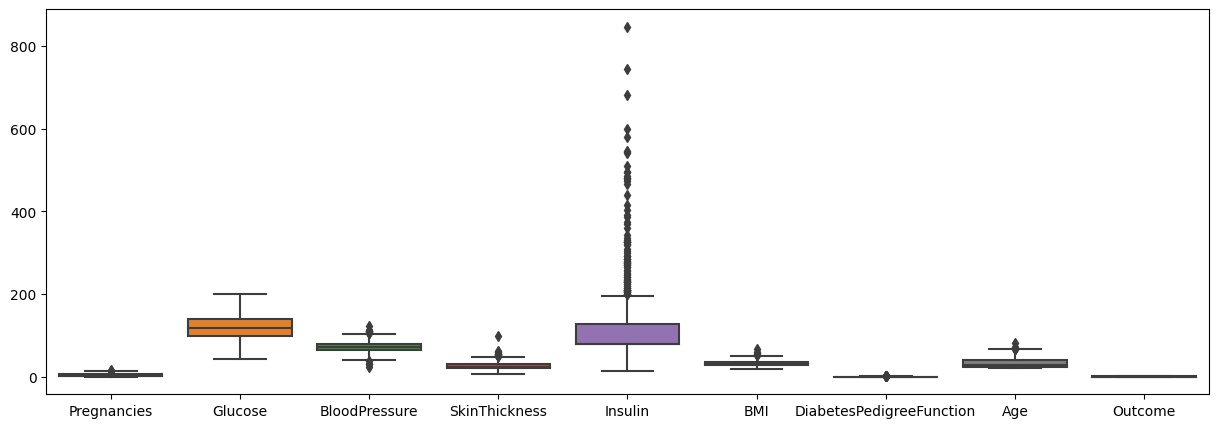

In [52]:
plt.figure(figsize=(15 , 5))
sns.boxplot(df)

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [55]:
X=df.iloc[: , :-1]
y=df.iloc[: ,-1]

In [57]:
X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

In [58]:
import pickle


def scaling(X_train , X_test):
    scaler=StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    file=open("standardscaler.pkl" , 'wb')
    pickle.dump(scaler , file)
    file.close
    
    return X_train_scaled , X_test_scaled

In [59]:
X_train_scaled , X_test_scaled = scaling(X_train , X_test)

In [61]:
import warnings 
warnings.filterwarnings('ignore')

In [62]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [64]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

In [65]:
clf=GridSearchCV(classifier , param_grid=parameter , cv=3 ,scoring='accuracy' , verbose=3)
clf.fit(X_train , y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.641 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.651 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.630 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.708 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.583 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [66]:
 clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [67]:
clf.best_score_

0.75

In [69]:
model=DecisionTreeClassifier(criterion='gini' , max_depth=5 , max_features='log2' , splitter='best')

In [76]:
model

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [77]:
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [78]:
y_pred=model.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score , precision_score , recall_score , f1_score

In [81]:
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))
print(f1_score(y_test , y_pred))

[[109  21]
 [ 22  40]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       130
           1       0.66      0.65      0.65        62

    accuracy                           0.78       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.78      0.78      0.78       192

0.7760416666666666
0.6557377049180327
0.6451612903225806
0.6504065040650406


## SVC

In [82]:
## Support Vector Classifier With Hyperparameter Tuning

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }

In [83]:
svc=SVC()
gscv=GridSearchCV(svc , param_grid=param_grid , cv=3 , verbose=3 , scoring='accuracy')

In [84]:
gscv.fit(X_train , y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.5s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.1s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.5s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.1s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [85]:
gscv.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [86]:
gscv.best_score_

0.7621527777777778

In [89]:
svc=SVC(C=0.1 , gamma=1 , kernel='linear')

In [90]:
svc.fit(X_train , y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [91]:
y_pred=svc.predict(X_test)

In [92]:
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))
print(f1_score(y_test , y_pred))

[[117  13]
 [ 27  35]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       130
           1       0.73      0.56      0.64        62

    accuracy                           0.79       192
   macro avg       0.77      0.73      0.75       192
weighted avg       0.79      0.79      0.78       192

0.7916666666666666
0.7291666666666666
0.5645161290322581
0.6363636363636364


In [93]:
import pickle

file=open('model.pkl' , 'wb')
pickle.dump(svc , file)
file.close()

## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [95]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500]
}


In [97]:
gscv_lg=GridSearchCV(lr , param_grid=param_grid , cv=3 , refit =True , verbose =3 , scoring='accuracy')

In [98]:
gscv_lg.fit(X_train , y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.688 total time=   0.0s
[CV 2/3] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.734 total time=   0.0s
[CV 3/3] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.708 total time=   0.0s
[CV 1/3] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga;, score=0.688 total time=   0.0s
[CV 2/3] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga;, score=0.734 total time=   0.0s
[CV 3/3] END C=0.01, class_weight=None, max_iter=100, penalty=l1, solver=saga;, score=0.703 total time=   0.0s
[CV 1/3] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=liblinear;, score=0.714 total time=   0.0s
[CV 2/3] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 3/3] END C=0.01, cla

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=3)

In [99]:
gscv_lg.best_params_

{'C': 10,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [100]:
lr=LogisticRegression(C=10 , max_iter=100 , penalty='l1' , solver='liblinear')

In [101]:
lr.fit(X_train , y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [102]:
y_pred=lr.predict(X_test)

In [103]:
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))
print(f1_score(y_test , y_pred))

[[117  13]
 [ 26  36]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192

0.796875
0.7346938775510204
0.5806451612903226
0.6486486486486487


In [108]:
file=open('model.pkl' , 'wb')
pickle.dump(lr , file)
file.close()

## Gaussian Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
gnb=GaussianNB()

In [112]:
gnb.fit(X_train , y_train)

GaussianNB()

In [113]:
y_pred=gnb.predict(X_test)

In [114]:
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))
print(f1_score(y_test , y_pred))

[[113  17]
 [ 29  33]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       130
           1       0.66      0.53      0.59        62

    accuracy                           0.76       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192

0.7604166666666666
0.66
0.532258064516129
0.5892857142857142
